# STOCK PRICE PREDICTION OF RELIANCE COMPANY(5 yr data)

In [1]:
#IMPORTING ALL REQUIRED PACKAGES
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.ticker as ticker

In [2]:
data=pd.read_csv('rel_5.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,514.500000,515.974976,507.750000,510.250000,498.874023,608820.0
1,2016-03-29,511.524994,520.450012,511.200012,517.700012,506.157867,493374.0
2,2016-03-30,520.174988,525.450012,520.125000,522.450012,510.802002,450896.0
3,2016-03-31,521.500000,527.974976,517.049988,522.625000,510.973083,585470.0
4,2016-04-01,519.500000,522.950012,513.200012,516.825012,505.302460,410832.0
...,...,...,...,...,...,...,...
1231,2021-03-22,2075.000000,2075.000000,2033.900024,2061.850098,2061.850098,317137.0
1232,2021-03-23,2064.000000,2109.899902,2057.250000,2089.050049,2089.050049,578793.0
1233,2021-03-24,2080.550049,2080.550049,2040.800049,2047.300049,2047.300049,307569.0
1234,2021-03-25,2050.550049,2057.550049,1985.000000,1992.750000,1992.750000,309621.0


# EXPLORATORY DATA ANALYSIS(EDA)

In [3]:
#CHECKING SHAPE OF DATASET
data.shape

(1236, 7)

In [4]:
data.iloc[197]

Date         2017-01-12
Open            544.225
High                545
Low             539.575
Close           541.575
Adj Close       529.501
Volume           241238
Name: 197, dtype: object

In [5]:
#CHECKING NULL VALUES IN DATASET
data.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [6]:
#SINCE THE DATASET HAD NULL VALUES, WE REMOVE IT USING DROPNA() 
data1=data.dropna()
data1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,514.500000,515.974976,507.750000,510.250000,498.874023,608820.0
1,2016-03-29,511.524994,520.450012,511.200012,517.700012,506.157867,493374.0
2,2016-03-30,520.174988,525.450012,520.125000,522.450012,510.802002,450896.0
3,2016-03-31,521.500000,527.974976,517.049988,522.625000,510.973083,585470.0
4,2016-04-01,519.500000,522.950012,513.200012,516.825012,505.302460,410832.0
...,...,...,...,...,...,...,...
1231,2021-03-22,2075.000000,2075.000000,2033.900024,2061.850098,2061.850098,317137.0
1232,2021-03-23,2064.000000,2109.899902,2057.250000,2089.050049,2089.050049,578793.0
1233,2021-03-24,2080.550049,2080.550049,2040.800049,2047.300049,2047.300049,307569.0
1234,2021-03-25,2050.550049,2057.550049,1985.000000,1992.750000,1992.750000,309621.0


In [7]:
data1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
#DESCIPTION OF DATASET
data1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1.234000e+03
mean,1144.389116,1157.562100,1129.569704,1142.746991,1133.512592,2.758124e+06
std,501.416854,507.604986,492.612803,499.443885,503.516700,3.890739e+07
min,465.450012,470.000000,462.850006,465.000000,454.632843,0.000000e+00
25%,713.949982,720.006256,703.106247,712.574982,696.688125,3.372878e+05
50%,1102.928527,1114.750000,1086.900024,1100.600036,1091.890503,4.799800e+05
75%,1432.027222,1445.787476,1406.924255,1423.242340,1417.919220,7.796555e+05
max,2323.699951,2368.800049,2311.750000,2323.850098,2323.850098,7.946228e+08


In [9]:
#INFORMATION ABOUT DATASET
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1234 non-null   object 
 1   Open       1234 non-null   float64
 2   High       1234 non-null   float64
 3   Low        1234 non-null   float64
 4   Close      1234 non-null   float64
 5   Adj Close  1234 non-null   float64
 6   Volume     1234 non-null   float64
dtypes: float64(6), object(1)
memory usage: 77.1+ KB


In [10]:
data2 = data1.groupby('Date')[['Close']].mean()


In [11]:
data2

,Close
Date,
2016-03-28,510.250000
2016-03-29,517.700012
2016-03-30,522.450012
2016-03-31,522.625000
2016-04-01,516.825012
...,...
2021-03-22,2061.850098
2021-03-23,2089.050049
2021-03-24,2047.300049


In [12]:
type(data1.Date[0])

str

# VISUALIZATION OF DATASET

Text(0, 0.5, 'Price')

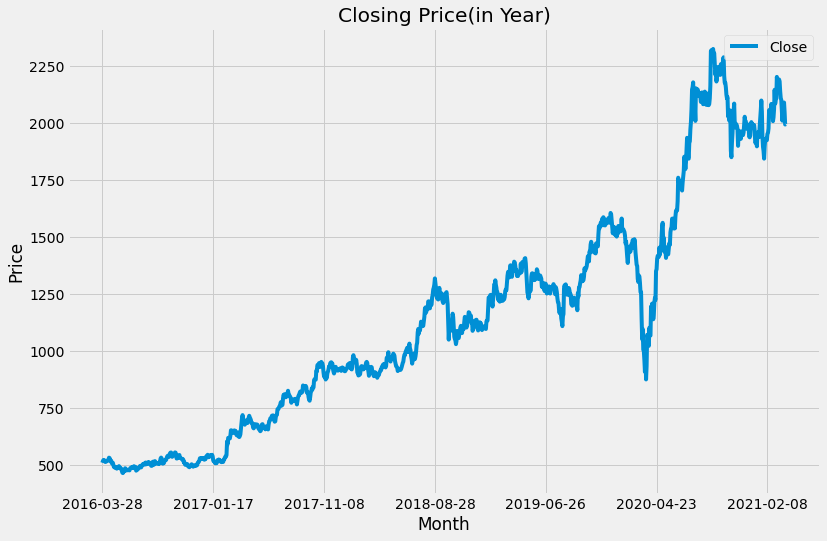

In [13]:
#plotting the graph with date againts closing price(in month)
data1.plot(figsize=(12,8),x='Date',y='Close',title='Closing Price(in Year)',fontsize=14)
plt.xlabel("Month")
plt.ylabel("Price")

In [14]:
data2

,Close
Date,
2016-03-28,510.250000
2016-03-29,517.700012
2016-03-30,522.450012
2016-03-31,522.625000
2016-04-01,516.825012
...,...
2021-03-22,2061.850098
2021-03-23,2089.050049
2021-03-24,2047.300049


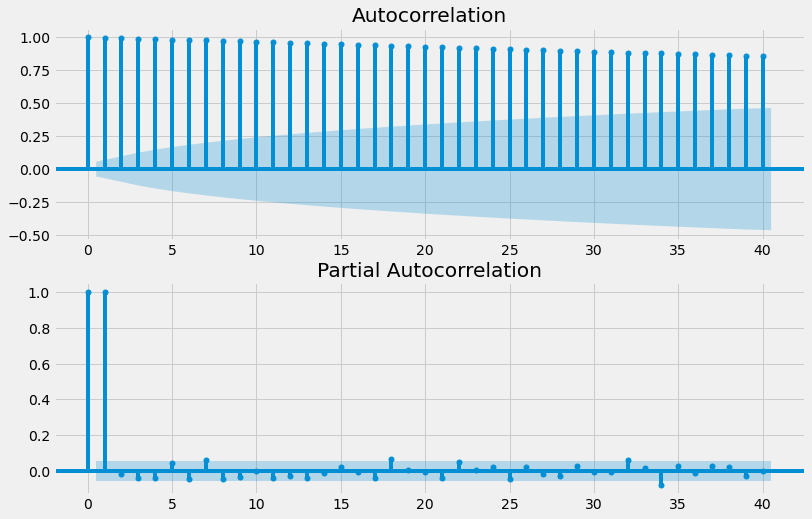

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data2['Close'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data2['Close'].iloc[13:],lags=40,ax=ax2)

# DICKEY FULLER TEST(For checking stationarity)

In [16]:
test_result=adfuller(data2['Close'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [17]:
data2['Close First Difference'] = data2['Close'] - data2['Close'].shift(1)
data2['Close'].shift(1)


Date
2016-03-28            NaN
2016-03-29     510.250000
2016-03-30     517.700012
2016-03-31     522.450012
2016-04-01     522.625000
                 ...     
2021-03-22    2081.899902
2021-03-23    2061.850098
2021-03-24    2089.050049
2021-03-25    2047.300049
2021-03-26    1992.750000
Name: Close, Length: 1234, dtype: float64

ADF Test Statistic : -15.23228186249169
p-value : 5.300977290729782e-28
#Lags Used : 4
Number of Observations Used : 1228
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Text(0, 0.5, 'Price')

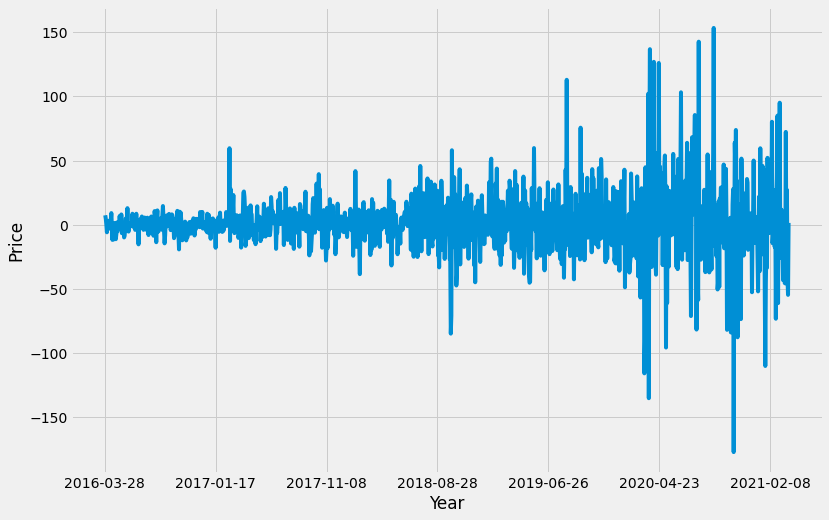

In [18]:
adfuller_test(data2['Close First Difference'].dropna())
data2['Close First Difference'].plot(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Price")

In [19]:
stepwise_fit = auto_arima(data2['Close'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11423.132, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11424.933, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11424.935, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11424.028, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11426.946, Time=1.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 10.544 seconds


In [20]:
train_data, test_data = data2[0:int(len(data2)*0.7)], data2[int(len(data2)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


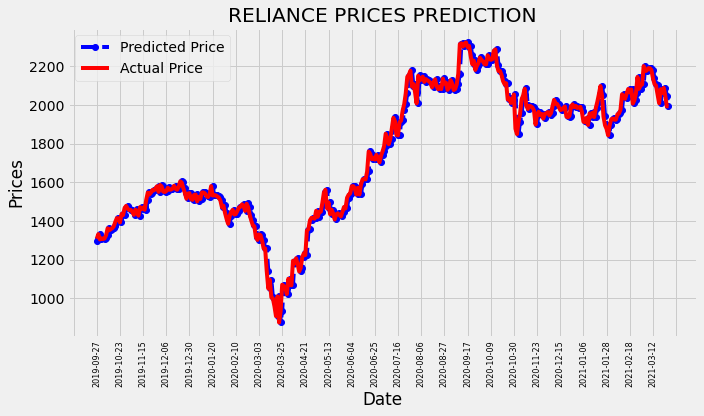

In [21]:
test_set_range = data2[int(len(data2)*0.7):].index
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('RELIANCE PRICES PREDICTION')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(rotation=90)
plt.tick_params(axis='x' ,labelsize=8)
# plt.xticks(np.arange(881,1259,50), data2.Date[881:1259:50])
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
pred=model_fit.predict(start=len(data2),end=len(data2)+30,typ='levels')
print(pred)

[1993.95332792 1995.15665584 1996.35998377 1997.56331169 1998.76663961
 1999.96996753 2001.17329545 2002.37662338 2003.5799513  2004.78327922
 2005.98660714 2007.18993506 2008.39326299 2009.59659091 2010.79991883
 2012.00324675 2013.20657468 2014.4099026  2015.61323052 2016.81655844
 2018.01988636 2019.22321429 2020.42654221 2021.62987013 2022.83319805
 2024.03652597 2025.2398539  2026.44318182 2027.64650974 2028.84983766
 2030.05316558 2031.25649351]


In [23]:
# model performance
mse = mean_squared_error(test_data, model_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data,model_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, model_predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(model_predictions - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 1498.0558551456556
MAE: 27.590244559491964
RMSE: 38.70472652203676
MAPE: 0.2404636911807967
